In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [13]:
# Paths
TRAIN_PATH = '/kaggle/input/human-activity-recognition-with-smartphones/train.csv'
TEST_PATH = '/kaggle/input/human-activity-recognition-with-smartphones/test.csv'

# Load the train and test data
train_data = pd.read_csv(TRAIN_PATH)
test_data = pd.read_csv(TEST_PATH)

# Show the head of both of them
print(train_data.head())
print(test_data.head())

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

In [14]:
# Extract the Activity feature [Target] and labels from train and test datasets
X_train = train_data.drop('Activity', axis=1)
y_train = train_data['Activity']

# Extract all features except the Activity [Target]
X_test = test_data.drop('Activity', axis=1)
y_test = test_data['Activity']

# Shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7352, 562)
y_train shape: (7352,)
X_test shape: (2947, 562)
y_test shape: (2947,)


In [15]:
# Encode the [Target] feature
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Show first 5
print("Encoded y_train:", y_train[:5])

Encoded y_train: [2 2 2 2 2]


In [16]:
# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Show first 5
print("Normalized X_train:", X_train[:5])

Normalized X_train: [[0.64429225 0.48985291 0.43354743 ... 0.79825103 0.47068654 0.        ]
 [0.63920942 0.49179472 0.4382399  ... 0.79848665 0.47284164 0.        ]
 [0.63982653 0.49026642 0.44326915 ... 0.79872236 0.47544109 0.        ]
 [0.63958697 0.48689968 0.43835872 ... 0.79960011 0.47616841 0.        ]
 [0.63831439 0.49171517 0.44231908 ... 0.80177606 0.47805387 0.        ]]


In [17]:
# Reshape the input data for LSTM: (samples, time_steps = 1 {each feature is a time step}, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Show reshaped data
print("X_train_reshaped shape:", X_train_reshaped.shape)
print("X_test_reshaped shape:", X_test_reshaped.shape)

X_train_reshaped shape: (7352, 1, 562)
X_test_reshaped shape: (2947, 1, 562)


In [19]:
# Build the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(6, activation='softmax'))  # 6 activities, using softmax for multi-class classification

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 64)                  │         160,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,902 (628.52 KB)

 Trainable params: 160,902 (628.52 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_data=(X_test_reshaped, y_test))

# Try the model
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/10


I0000 00:00:1745687939.843944     105 cuda_dnn.cc:529] Loaded cuDNN version 90300


115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5098 - loss: 1.1879 - val_accuracy: 0.8914 - val_loss: 0.4231
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8628 - loss: 0.3951 - val_accuracy: 0.9084 - val_loss: 0.2836
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9091 - loss: 0.2715 - val_accuracy: 0.9104 - val_loss: 0.2447
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9346 - loss: 0.2093 - val_accuracy: 0.9287 - val_loss: 0.1941
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9402 - loss: 0.1789 - val_accuracy: 0.9233 - val_loss: 0.1952
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9521 - loss: 0.1487 - val_accuracy: 0.9382 - val_loss: 0.1620
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9524 - loss: 0.1421 - val_accuracy: 0.9325 - val_loss: 0.1724
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9583 - loss: 0.1199 - val_accuracy: 0.9250 - val_

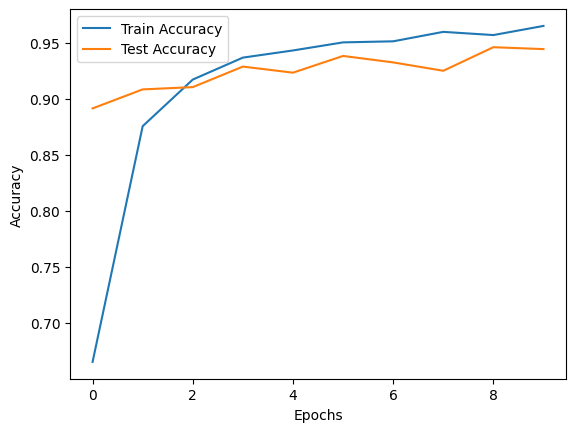

In [21]:
# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()